In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
tf.random.set_seed(7)

In [5]:
gdp_Data= pd.read_csv('/content/sample_data/gdp_data.csv')

df = gdp_Data[[ 'Tbill', 'PPINSA', 'CPI', 'M1NSA', 'Unemp', 'IndProd', 'RGDP' ]]
descdf = df.describe()
descdf

,Tbill,PPINSA,CPI,M1NSA,Unemp,IndProd,RGDP
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5.032547,98.845896,113.182028,754.642877,6.081981,60.751840,7664.750472
std,2.993406,50.408646,65.310267,544.198580,1.614394,23.479552,3390.652274
min,0.010000,31.470000,29.400000,138.400000,3.400000,22.130000,2800.200000
25%,3.077500,44.015000,43.705000,253.097500,4.970000,41.550000,4818.650000
50%,4.955000,103.350000,109.635000,665.300000,5.715000,55.200000,7078.950000
75%,6.412500,128.447500,167.507500,1134.432500,7.130000,86.425000,10859.225000
max,15.050000,203.830000,231.280000,2436.730000,10.670000,100.510000,13665.400000


In [6]:
normalized_df=(df-df.mean())/df.std()
display(normalized_df)
df = normalized_df

,Tbill,PPINSA,CPI,M1NSA,Unemp,IndProd,RGDP
0,-0.388369,-1.332626,-1.282831,-1.128472,-0.589683,-1.568251,-1.421393
1,-0.682349,-1.331436,-1.280228,-1.132386,-0.527741,-1.590398,-1.425316
2,-0.892811,-1.333420,-1.279922,-1.130181,-0.341912,-1.607009,-1.423959
3,-0.909515,-1.332031,-1.277013,-1.124540,0.116464,-1.630433,-1.434695
4,-0.896152,-1.330048,-1.276094,-1.125348,0.444761,-1.644914,-1.429769
...,...,...,...,...,...,...,...
207,-1.677870,2.021957,1.742268,2.593037,1.603090,1.472693,1.703581
208,-1.657826,2.049730,1.762173,2.681608,1.355319,1.531041,1.722869
209,-1.651145,2.042390,1.770900,2.763067,1.293376,1.555318,1.735285
210,-1.647804,2.054292,1.789121,2.888334,1.206656,1.560428,1.765958


In [7]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df[:train_size], df[train_size:]
print(train.shape)
print(test.shape)

(148, 7)
(64, 7)


In [ ]:
# def create_dataset(dataset, look_back=1):
#   print(len(dataset))
#   dataX, dataY = [], []
#   for i in range(len(dataset)-look_back-1):
#     a = dataset.iloc[i:(i+look_back)]
#     dataX.append(a)
#     dataY.append(dataset.iloc[i+look_back, -1])
#   return np.array(dataX), np.array(dataY)

In [9]:
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

In [8]:
trainX = train.iloc[:]
testX = test.iloc[:]

In [10]:
print(trainX.shape)
print(testX.shape)

(148, 7)
(64, 7)


In [11]:
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# trainX = np.expand_dims(trainX, axis=1)
# testX = np.expand_dims(testX, axis=1)
# print(trainX.shape)
# print(testX.shape)

In [12]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  # print(len(sequence))
  for i in range(len(sequence)):
		# find the end of this pattern
    end_ix = i + n_steps
		# check if we are beyond the sequence
    # print('checkpoint 1')
    if end_ix > len(sequence)-1:
      break
    # print('checkpoint 2')
    # print(i, end_ix)
    # print(sequence[0:3])
		# gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence.iloc[end_ix]
    # print('checkpoint 3')
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [247]:
# n_steps = 3
# tX, tY = split_sequence(trainX.iloc[:,0], n_steps)


In [32]:
n_steps = 3
models = []
for feature in range(7):
  tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
  tX = np.expand_dims(tX, axis=1)
  model = Sequential()
  model.add(LSTM(1, input_shape=(1,n_steps)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(tX, tY, epochs=20, batch_size=1, verbose=1)
  models.append(model)

Epoch 1/20
145/145 [==============================] - 3s 2ms/step - loss: 0.9745
Epoch 2/20
145/145 [==============================] - 0s 2ms/step - loss: 0.9145
Epoch 3/20
145/145 [==============================] - 0s 2ms/step - loss: 0.8727
Epoch 4/20
145/145 [==============================] - 0s 2ms/step - loss: 0.8376
Epoch 5/20
145/145 [==============================] - 0s 2ms/step - loss: 0.8026
Epoch 6/20
145/145 [==============================] - 0s 3ms/step - loss: 0.7601
Epoch 7/20
145/145 [==============================] - 0s 3ms/step - loss: 0.7103
Epoch 8/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6613
Epoch 9/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6177
Epoch 10/20
145/145 [==============================] - 0s 2ms/step - loss: 0.5809
Epoch 11/20
145/145 [==============================] - 0s 2ms/step - loss: 0.5488
Epoch 12/20
145/145 [==============================] - 0s 2ms/step - loss: 0.5194
Epoch 13/20
145/145 [====

In [321]:
# for feature, model in enumerate(models):
#   print('checkpoint ' + str(feature))
#   tesX, tesY = split_sequence(testX.iloc[:,feature], n_steps)
print(testX.shape)

(64, 7)


In [33]:
train_predictions = []
test_predictions = []
for feature in range(7):
  tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
  tesX, tesY = split_sequence(testX.iloc[:,feature], n_steps)
  tX = np.expand_dims(tX, axis=1)
  tesX = np.expand_dims(tesX, axis=1)
  trainPredict = models[feature].predict(tX)
  testPredict = models[feature].predict(tesX)
  
  train_predictions.append(trainPredict)
  test_predictions.append(testPredict)

2/2 [==============================] - 0s 5ms/step


In [209]:
# def data_integration(data):
#     data = data.cumsum()
#     return data

In [ ]:
# def data_differencing(data):
#     pd.DataFrame(
#     seed_row = data.iloc[0:1, :]
#     diff_data = data.diff().dropna()
#     diff_data = pd.concat([seed_row, diff_data])
#     return diff_data

In [215]:
# trainPredict = data_integration(trainPredict)
# trainY = data_integration(trainY)
# testPredict = data_integration(testPredict)
# testY = data_integration(testY)

# trainPredict = data_differencing(trainPredict)
# testPredict = data_differencing(testPredict)

In [338]:
print(trainPredict.shape)
print(testPredict.shape)

(145, 1)
(61, 1)


In [415]:
from sklearn.metrics import mean_squared_error

trainScore = np.sqrt(mean_squared_error(tY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(tesY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 1.11 RMSE


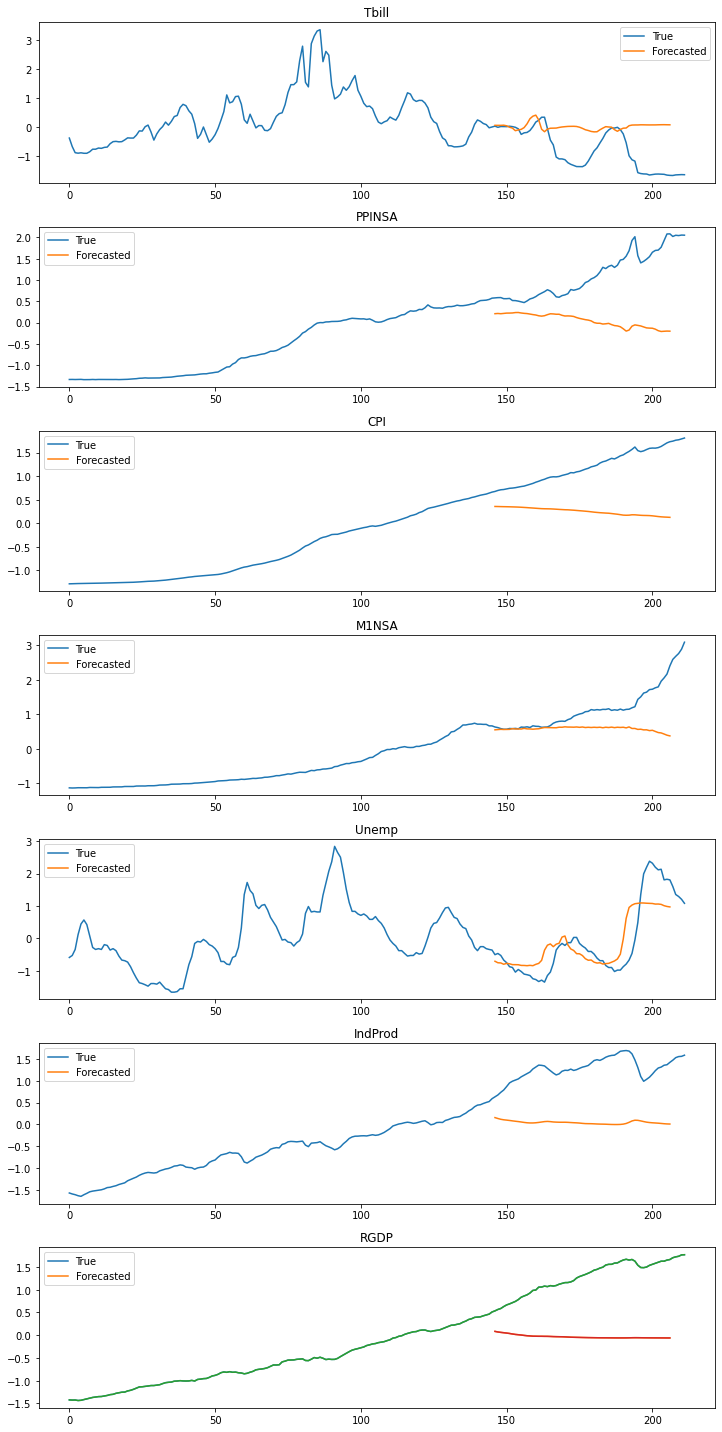

In [53]:
n_plots = gdp_Data.shape[1]-1

fig, axs = plt.subplots(n_plots, 1, figsize=(10, 20))

for i, column in enumerate(gdp_Data.columns):
    ax = axs[i-1]
    # preds_final = train_predictions[i-1]
    # preds_final = np.append(preds_final, test_predictions[i-1])
    preds_final_x = range(146,207)
    preds_final = test_predictions[i-1]

    ax.plot(np.append(trainX.iloc[:, i-1], testX.iloc[:, i-1]))
    ax.plot(preds_final_x, preds_final)
    ax.legend(['True', 'Forecasted'])
    ax.set_title(column)
    
plt.tight_layout()

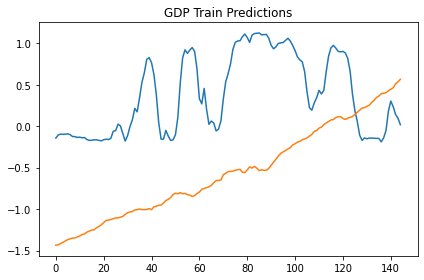

In [35]:
trainPredictPlot = train_predictions[0]
plt.plot(trainPredictPlot)
plt.plot(tY)
plt.title('GDP Train Predictions')
plt.tight_layout()
plt.show()

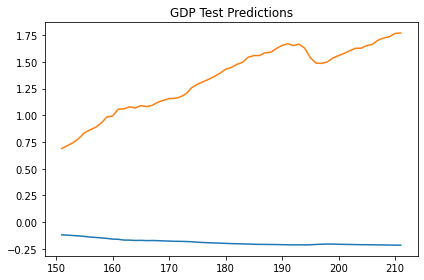

In [28]:
testPredictPlot = testPredict
plt.plot(range(151,212), testPredictPlot)
plt.plot(range(151,212), tesY)
plt.title('GDP Test Predictions')
plt.tight_layout()
plt.show()